In [2]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

In [21]:
imageSize = 256
batchSize = 32
channelSize = 3
epochs = 50

In [5]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "PlantVillage",
    shuffle=True,
    image_size=(imageSize, imageSize),
    batch_size=batchSize
)

Found 2152 files belonging to 3 classes.


In [7]:
classNames = dataset.class_names
classNames

['Early Blight', 'Healthy', 'Late Blight']

In [9]:
for imageBatch, labelBatch in dataset.take(1):
    print(imageBatch.shape)
    print(labelBatch.numpy())

(32, 256, 256, 3)
[0 0 2 2 0 2 0 0 0 0 0 0 0 0 2 2 0 2 2 2 2 2 0 0 0 2 0 1 2 1 0 0]


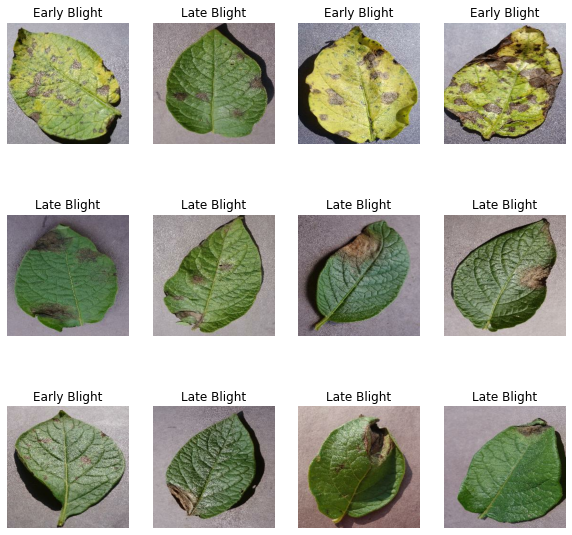

In [20]:
plt.figure(figsize=(10,10))
for imageBatch, labelBatch in dataset.take(1):
    for i in range(12):
        ax = plt.subplot(3,4,i+1)
        plt.imshow(imageBatch[i].numpy().astype("uint8"))
        plt.title(classNames[labelBatch[i]])
        plt.axis("off")
    

In [22]:
trainingSize = 0.8
validationSize = 0.1
testSize = 0.1

In [32]:
training_ds = dataset.take(int(len(dataset) * trainingSize))

In [42]:
remaining_ds = dataset.skip(len(training_ds))

In [43]:
validation_ds = remaining_ds.take(int(len(remaining_ds) * 0.5))

In [46]:
test_ds = remaining_ds.skip(len(validation_ds))

In [56]:
def getDatasetPartitions(ds, shuffle=True, shuffleSize=1000, trainingSize = 0.8, validationSize = 0.1, testSize = 0.1):
    if shuffle:
        ds = ds.shuffle(shuffleSize, seed=12)
    training_ds = ds.take(int(len(ds) * trainingSize))
    remaining_ds = ds.skip(len(training_ds))
    validation_ds = ds.take(int(len(ds) * validationSize))
    test_ds = remaining_ds.skip(len(validation_ds))
    return training_ds, validation_ds, test_ds

In [57]:
training_ds, validation_ds, test_ds = getDatasetPartitions(dataset)

In [58]:
len(training_ds)

54

In [59]:
len(validation_ds)

6

In [60]:
len(test_ds)

8

In [61]:
training_ds = training_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
validation_ds = training_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = training_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [63]:
resize_and_rescale = tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(imageSize, imageSize),
    layers.experimental.preprocessing.Rescaling(1.0/255)
])

In [64]:
data_augmentation = tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2)
])